# **The Curse of Dimensionality Explained**

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

%matplotlib inline

## **1.** Setup the number _N_ of _d_-dimensional random points to be sampled

In [0]:
N = 100 # number of data points
dim = [1,2,3,10,100,1000,10000,100000,1000000] # number of dimensions

## **2.** Extract _N_ samples uniformly drawn from the range [0, 1) for each dimension _d_

In [0]:
samples = {}
for d in dim:
    samples[d] = np.random.rand(N, d) # sample N d-dimensional data points

## **3.** Compute all pair distances between each point of an _N_-size sample of _d_-dimensional data points

In [0]:
all_pairs_distances = {}
max_distance = {}

for d in dim:
    dist_dim = []
    for u, v in combinations(samples[d], 2):
        dist_dim.append(np.linalg.norm(u-v))
    all_pairs_distances[d] = dist_dim
    max_distance[d] = np.max(dist_dim)

## **4.** Plot the histogram along with the density estimate of the distribution of distances as computed for each value of _d_

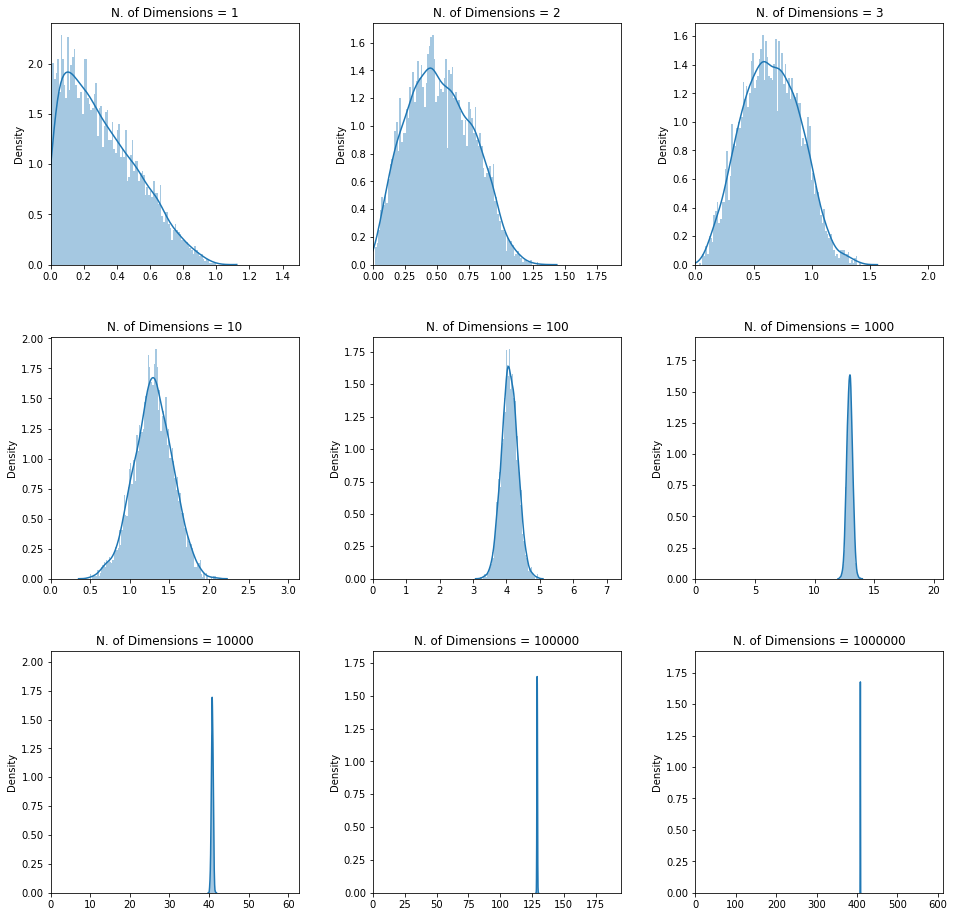

In [0]:
# Set up the plot
fig, axes = plt.subplots(3, 3, figsize=(16, 16))

binwidth = 0.01

for i,d in enumerate(dim):
    ax = axes[i//3, i%3]
    _ = sns.distplot(all_pairs_distances[d], bins = int(1/binwidth), ax=ax)
    _ = ax.set_xlim([0, 1.5*max_distance[d]])
    _ = ax.set_ylabel("Density")
    _ = ax.set_title("N. of Dimensions = {}".format(d))
plt.subplots_adjust(wspace=.3, hspace=.3)